In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import configparser
import klib
import warnings
warnings.filterwarnings('ignore')

In [14]:
from Adjuct_Memory import memoryManager

In [15]:
config = configparser.ConfigParser()
config.read(r'Config/config.ini')

['Config/config.ini']

# Data Description

| Variable Name	| Description	| Type
| ---	| ---	| ---
|SeriousDlqin2yrs|	Person experienced 90 days past due delinquency or worse 	|Y/N
RevolvingUtilizationOfUnsecuredLines|	Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits|	percentage
age|	Age of borrower in years	|integer
NumberOfTime30-59DaysPastDueNotWorse	|Number of times borrower has been 30-59 days past due but no worse in the last 2 years.	|integer
DebtRatio|	Monthly debt payments, alimony,living costs divided by monthy gross income	|percentage
MonthlyIncome|	Monthly income	|real
NumberOfOpenCreditLinesAndLoans	|Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)|	integer
NumberOfTimes90DaysLate|	Number of times borrower has been 90 days or more past due.|	integer
NumberRealEstateLoansOrLines	|Number of mortgage and real estate loans including home equity lines of credit	|integer
NumberOfTime60-89DaysPastDueNotWorse|	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.	|integer
NumberOfDependents	|Number of dependents in family excluding themselves (spouse, children etc.)|	integer


# Loading data set

In [16]:
config['Training_Data']['file_path'] +'\\'+ config['Training_Data']['file_name']

'.\\DataSet\\cs-training.csv'

In [17]:
# load dataset
data = pd.read_csv(config['Training_Data']['file_path'] +'\\'+ config['Training_Data']['file_name'])
data_t = pd.read_csv(config['Testing_Data']['file_path'] +'\\'+ config['Testing_Data']['file_name'])
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# Dropping unwanted data from both train and test dataset

In [18]:
# drop id, it is just a number given to identify each house
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data_t.drop(['Unnamed: 0'], axis=1, inplace=True)
data.shape,data_t.shape

((150000, 11), (101503, 11))

# Reducing the dataset size

In [19]:
train_data = memoryManager.reduce_mem_usage(data)
test_data = memoryManager.reduce_mem_usage(data_t)

Memory usage of dataframe is 12.59 MB
Memory usage after optimization is: 2.72 MB
Decreased by 78.4%
Memory usage of dataframe is 8.52 MB
Memory usage after optimization is: 2.52 MB
Decreased by 70.5%


# Copying original data which can used for transformation

In [20]:
transformed_data = train_data.copy()

# Target feature distribution

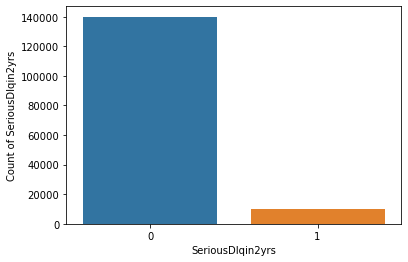

In [21]:
# countplot to evaluate target distribution # SeriousDlqin2yrs
sns.countplot(train_data['SeriousDlqin2yrs'])
plt.ylabel('Count of SeriousDlqin2yrs')
plt.xlabel('SeriousDlqin2yrs')
plt.show()

In [22]:
train_data.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [23]:
(len(train_data[train_data.SeriousDlqin2yrs==1])/len(train_data))*100

6.683999999999999

In [24]:
train_data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

> - MonthlyIncome and NumberOfDependents having null values
> - Target is imbalance as ration of defaulters to non defaulters is very minimum

In [25]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,NaN,NaN,0.0,0.029861,0.154175,0.559082,50720.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,352.825867,2038.782471,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.017090,14383.863281,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


> - Except Age all other independent parameters are highly skewed.
> - There is huge difference in mean and median for skewed data columns

In [26]:
Target = ['SeriousDlqin2yrs']

Percentage = ['RevolvingUtilizationOfUnsecuredLines','DebtRatio']

Real = ['MonthlyIncome']

Numeric_Param = ["NumberOfDependents",
                 "NumberRealEstateLoansOrLines",
                 "NumberOfOpenCreditLinesAndLoans",
                 "age"]

Delay_param = ["NumberOfTime30-59DaysPastDueNotWorse",
               "NumberOfTime60-89DaysPastDueNotWorse",
               "NumberOfTimes90DaysLate"]

<AxesSubplot:>

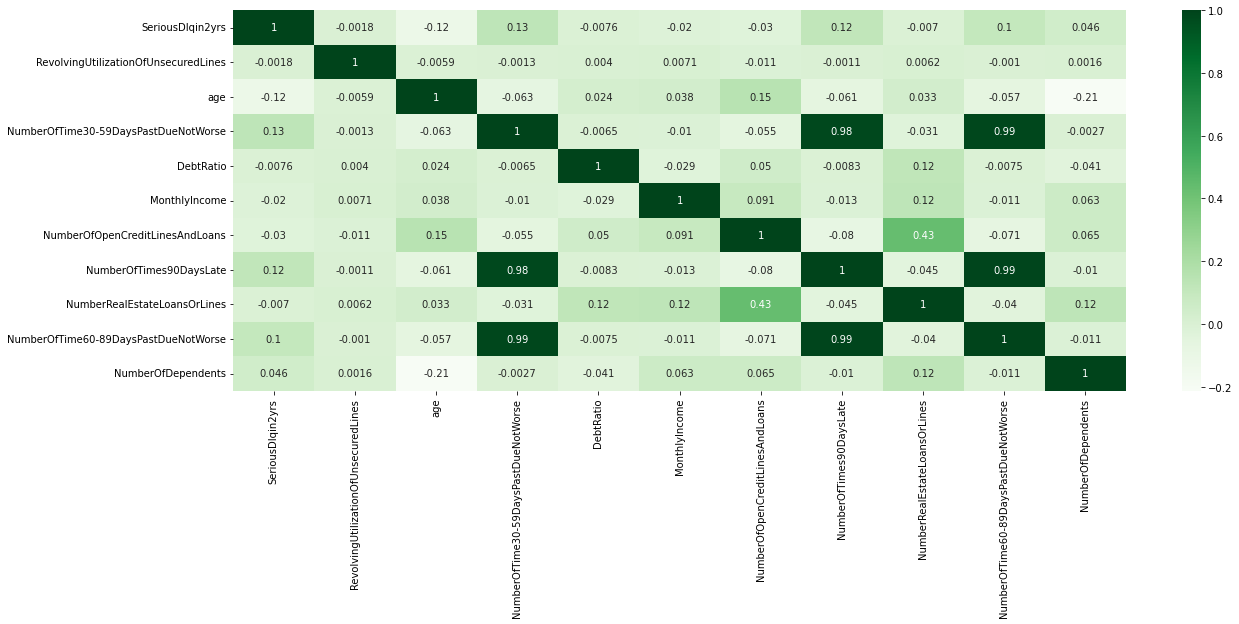

In [27]:
plt.figure(figsize = (20,7))
corr= train_data.corr()
matrix = np.triu(corr)
sns.heatmap(train_data.corr(),annot=True, cmap="Greens") #, mask=matrix)

# Number of similar records among below columns,
> - `"NumberOfTime30-59DaysPastDueNotWorse", 
   "NumberOfTime60-89DaysPastDueNotWorse",
   "NumberOfTimes90DaysLate"`

In [28]:
train_data[Delay_param][train_data[Delay_param].apply(lambda x: min(x) != max(x), 1)]['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

1     15777
0      6381
2      4568
3      1749
4       747
5       340
6       140
7        54
8        25
9        12
10        4
12        2
13        1
11        1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [29]:
pd.DataFrame([train_data[Delay_param[0]].value_counts(),train_data[Delay_param[1]].value_counts(),train_data[Delay_param[2]].value_counts()]).T

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
0,126018.0,142396.0,141662.0
1,16033.0,5731.0,5243.0
2,4598.0,1118.0,1555.0
3,1754.0,318.0,667.0
4,747.0,105.0,291.0
5,342.0,34.0,131.0
98,264.0,264.0,264.0
6,140.0,16.0,80.0
7,54.0,9.0,38.0
8,25.0,2.0,21.0


In [30]:
transformed_data.loc[transformed_data[Delay_param[0]].isin([96,98]),Delay_param[0]] = 0
transformed_data.loc[transformed_data[Delay_param[0]].isin([96,98]),Delay_param[1]] = 0
transformed_data.loc[transformed_data[Delay_param[0]].isin([96,98]),Delay_param[1]] = 0

In [31]:
test_data.loc[test_data[Delay_param[0]].isin([96,98]),Delay_param[0]] = 0
test_data.loc[test_data[Delay_param[0]].isin([96,98]),Delay_param[1]] = 0
test_data.loc[test_data[Delay_param[0]].isin([96,98]),Delay_param[1]] = 0

> - Records having values 96 and 98 in columns `"NumberOfTime30-59DaysPastDueNotWorse", 
 "NumberOfTime60-89DaysPastDueNotWorse",
 "NumberOfTimes90DaysLate"` is replaced with zero

In [32]:
transformed_data[transformed_data[Delay_param[0]].isin([96,98])]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


# Creating single column for 
### `"NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", `
### `"NumberOfTimes90DaysLate"`  

> - This features were highly correlated

In [33]:
transformed_data['Weighted_Delay_sum'] = transformed_data[Delay_param[0]]*0.2+\
                                         transformed_data[Delay_param[1]]*0.3+\
                                         transformed_data[Delay_param[2]]*0.5

In [34]:
test_data['Weighted_Delay_sum'] = test_data[Delay_param[0]]*0.2+\
                                         test_data[Delay_param[1]]*0.3+\
                                         test_data[Delay_param[2]]*0.5

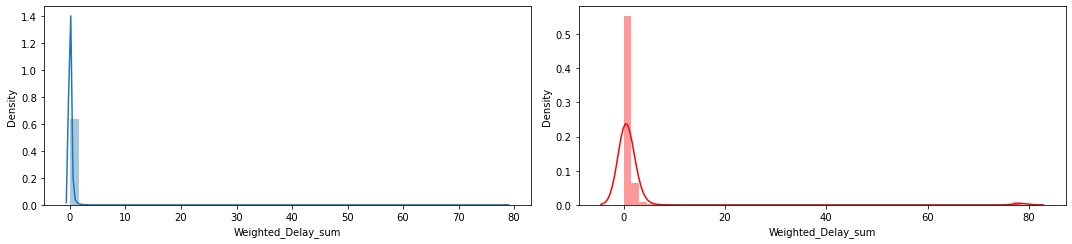

In [35]:
plt.rcParams["figure.figsize"] = [15.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1, 2)
sns.distplot(transformed_data.loc[transformed_data.SeriousDlqin2yrs==0,'Weighted_Delay_sum'], ax=ax[0])
sns.distplot(transformed_data.loc[transformed_data.SeriousDlqin2yrs==1,'Weighted_Delay_sum'], ax=ax[1],color='r')
plt.show()

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='Weighted_Delay_sum'>

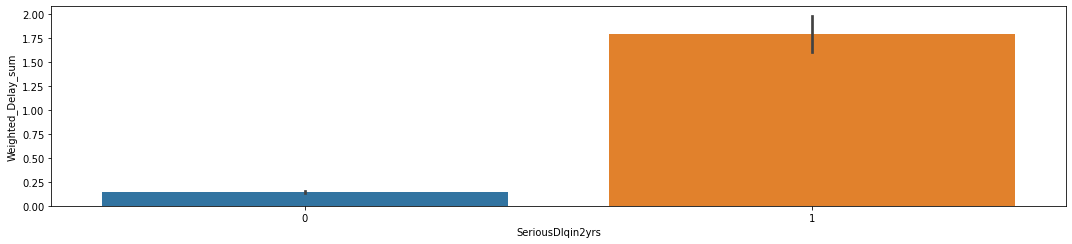

In [36]:
sns.barplot(x='SeriousDlqin2yrs',y='Weighted_Delay_sum',data=transformed_data)

> - With newly created feature `Weighted_Delay_sum` seems importance feature to classify defaulters vs non-defaulters

# Function to check Outliers

In [37]:
def mark_outliers_zscore(feature, threshold = 3):
    z = np.abs(stats.zscore(feature))
    res = [i for i,j in zip(z.index,z.values) if j >= threshold]
    print("Number of outliers : ", len(res))
    return res

# RevolvingUtilizationOfUnsecuredLines

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


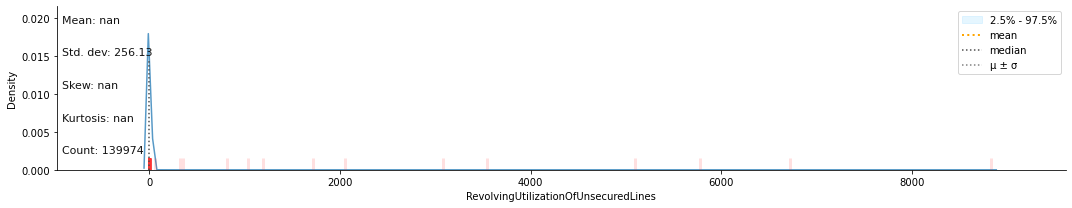

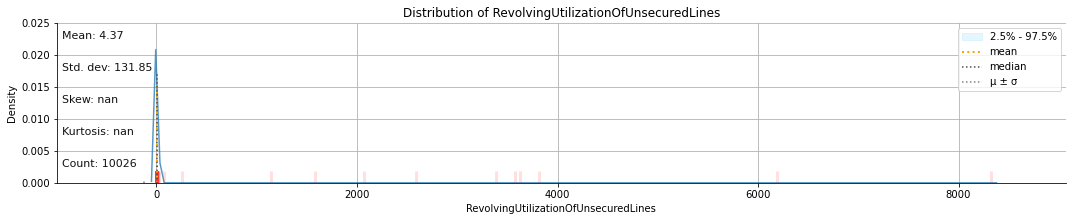

In [38]:
klib.dist_plot(train_data.loc[train_data['SeriousDlqin2yrs']==0,'RevolvingUtilizationOfUnsecuredLines'])
klib.dist_plot(train_data.loc[train_data['SeriousDlqin2yrs']==1,'RevolvingUtilizationOfUnsecuredLines'])
plt.grid()
plt.title("Distribution of RevolvingUtilizationOfUnsecuredLines");

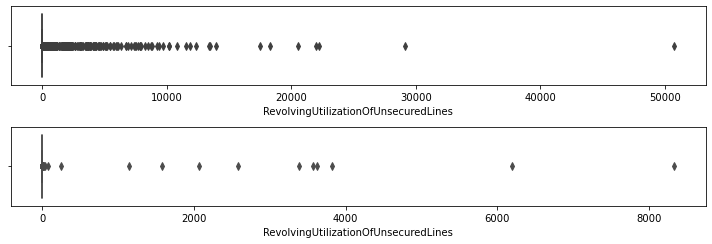

In [39]:
plt.rcParams["figure.figsize"] = [10.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(2, 1)
sns.boxplot(train_data.loc[train_data['SeriousDlqin2yrs']==0,'RevolvingUtilizationOfUnsecuredLines'], ax=ax[0])
sns.boxplot(train_data.loc[train_data['SeriousDlqin2yrs']==1,'RevolvingUtilizationOfUnsecuredLines'], ax=ax[1],color='r')
plt.show()

In [40]:
train_data[train_data.RevolvingUtilizationOfUnsecuredLines<=1]['SeriousDlqin2yrs'].value_counts()

0    137903
1      8792
Name: SeriousDlqin2yrs, dtype: int64

In [41]:
8792/(8792+137903)

0.05993387641023893

In [42]:
train_data[train_data.RevolvingUtilizationOfUnsecuredLines>1]['SeriousDlqin2yrs'].value_counts()

0    2071
1    1234
Name: SeriousDlqin2yrs, dtype: int64

In [43]:
1234/(1234+2071)

0.3733736762481089

In [44]:
train_data.loc[(train_data['SeriousDlqin2yrs']==0)&(train_data['RevolvingUtilizationOfUnsecuredLines']<=1),'RevolvingUtilizationOfUnsecuredLines']

1         0.957031
2         0.658203
3         0.233765
4         0.907227
5         0.213135
            ...   
149995    0.040680
149996    0.299805
149997    0.246094
149998    0.000000
149999    0.850098
Name: RevolvingUtilizationOfUnsecuredLines, Length: 137903, dtype: float16

> - Probability of getting default is getting increased by increase in `"RevolvingUtilizationOfUnsecuredLines"`. This can be observed in below distribution plot

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


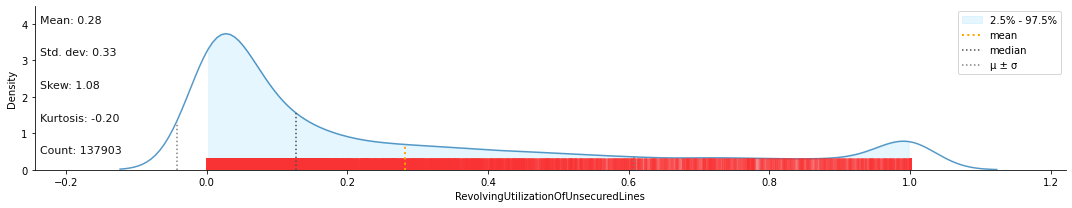

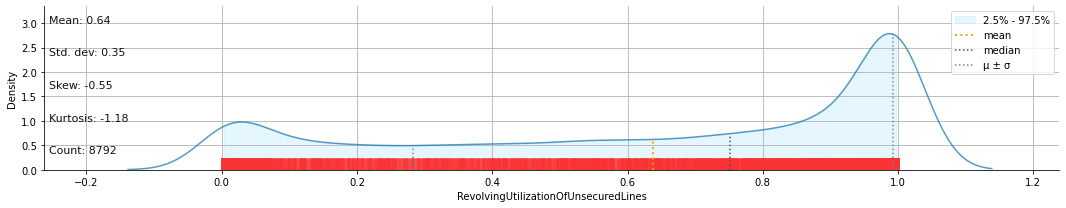

In [45]:
klib.dist_plot(train_data.loc[(train_data['SeriousDlqin2yrs']==0)&(train_data['RevolvingUtilizationOfUnsecuredLines']<=1),'RevolvingUtilizationOfUnsecuredLines'])
klib.dist_plot(train_data.loc[(train_data['SeriousDlqin2yrs']==1)&(train_data['RevolvingUtilizationOfUnsecuredLines']<=1),'RevolvingUtilizationOfUnsecuredLines'])
plt.grid()

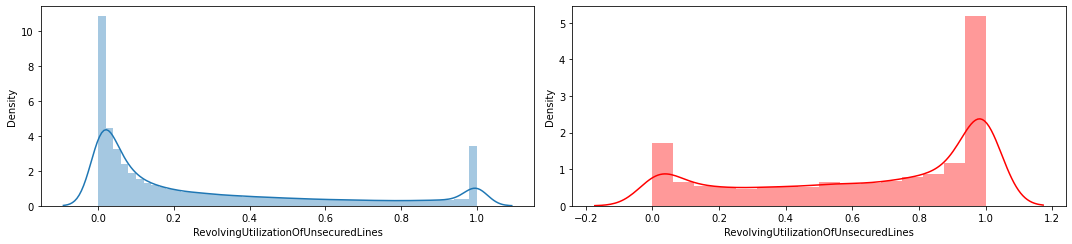

In [46]:
plt.rcParams["figure.figsize"] = [15.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1, 2)
sns.distplot(train_data.loc[(train_data['SeriousDlqin2yrs']==0)&(train_data['RevolvingUtilizationOfUnsecuredLines']<=1),'RevolvingUtilizationOfUnsecuredLines'], ax=ax[0])
sns.distplot(train_data.loc[(train_data['SeriousDlqin2yrs']==1)&(train_data['RevolvingUtilizationOfUnsecuredLines']<=1),'RevolvingUtilizationOfUnsecuredLines'], ax=ax[1],color='r')
plt.show()

(3305, 11)
0    2071
1    1234
Name: SeriousDlqin2yrs, dtype: int64


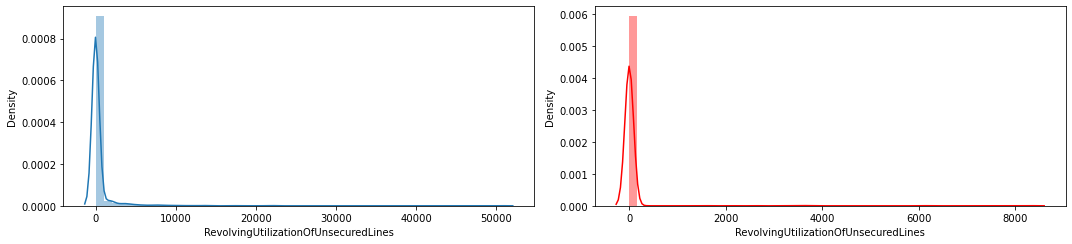

In [47]:
print(train_data[train_data.RevolvingUtilizationOfUnsecuredLines>1].shape)
print(train_data[train_data.RevolvingUtilizationOfUnsecuredLines>1]['SeriousDlqin2yrs'].value_counts())
plt.rcParams["figure.figsize"] = [15.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1, 2)
sns.distplot(train_data.loc[(train_data['SeriousDlqin2yrs']==0)&(train_data['RevolvingUtilizationOfUnsecuredLines']>1),'RevolvingUtilizationOfUnsecuredLines'], ax=ax[0])
sns.distplot(train_data.loc[(train_data['SeriousDlqin2yrs']==1)&(train_data['RevolvingUtilizationOfUnsecuredLines']>1),'RevolvingUtilizationOfUnsecuredLines'], ax=ax[1],color='r')
plt.show()

In [48]:
train_data[train_data.RevolvingUtilizationOfUnsecuredLines>=0.2]['SeriousDlqin2yrs'].value_counts()

0    59934
1     8380
Name: SeriousDlqin2yrs, dtype: int64

In [49]:
train_data[(train_data.RevolvingUtilizationOfUnsecuredLines>0.4)&(train_data.RevolvingUtilizationOfUnsecuredLines<=0.99999)]['SeriousDlqin2yrs'].value_counts()

0    38866
1     6274
Name: SeriousDlqin2yrs, dtype: int64

In [50]:
res = mark_outliers_zscore(train_data.RevolvingUtilizationOfUnsecuredLines)

Number of outliers :  0


>- As compare to whole data there are few values where `RevolvingUtilizationOfUnsecuredLines` is more than `1`, which is just around 2% of whole data.
>- Whenever `RevolvingUtilizationOfUnsecuredLines` is more than 8000 then target is always `1`.



# MonthlyIncome and Debtratio

In [51]:
interval = (0,18, 25, 35, 60, 110)
cats = ['Child','Student', 'Young', 'Adult', 'Old']
train_data['age_cat'] = pd.cut(train_data.age, interval, labels=cats)

In [52]:
transformed_data['age_cat'] = pd.cut(transformed_data.age, interval, labels=cats)

In [53]:
test_data['age_cat'] = pd.cut(test_data.age, interval, labels=cats)

In [54]:
res = mark_outliers_zscore(train_data.MonthlyIncome)

Number of outliers :  0


In [55]:
res = mark_outliers_zscore(train_data.DebtRatio)

Number of outliers :  659


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


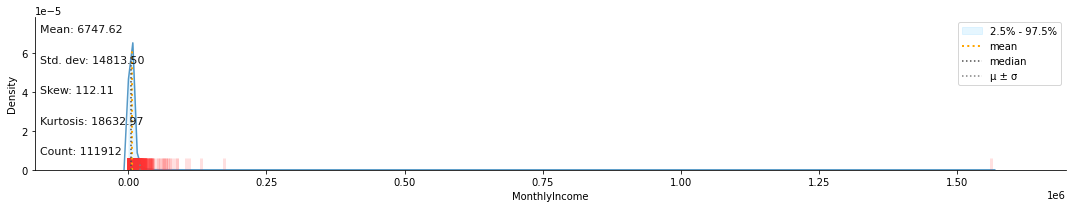

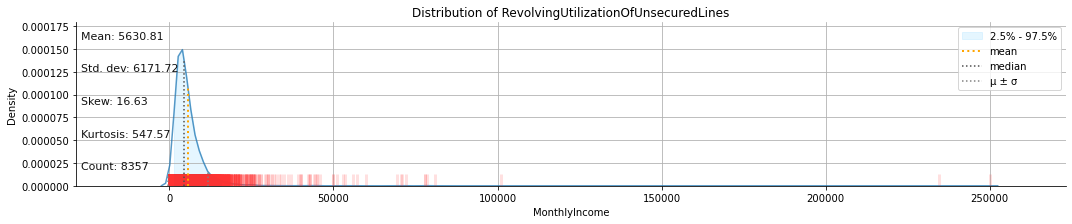

In [56]:
klib.dist_plot(train_data.loc[train_data['SeriousDlqin2yrs']==0,'MonthlyIncome'])
klib.dist_plot(train_data.loc[train_data['SeriousDlqin2yrs']==1,'MonthlyIncome'])
plt.grid()
plt.title("Distribution of RevolvingUtilizationOfUnsecuredLines");

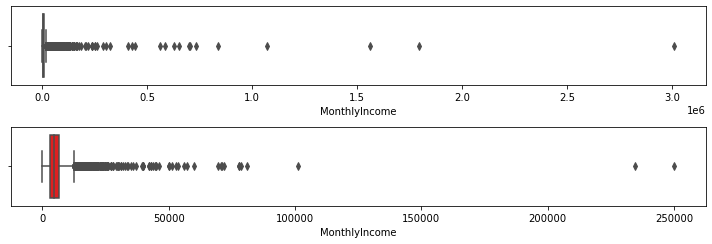

In [57]:
plt.rcParams["figure.figsize"] = [10.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(2, 1)
sns.boxplot(train_data.loc[train_data['SeriousDlqin2yrs']==0,'MonthlyIncome'], ax=ax[0],color='b')
sns.boxplot(train_data.loc[train_data['SeriousDlqin2yrs']==1,'MonthlyIncome'], ax=ax[1],color='r')
plt.show()

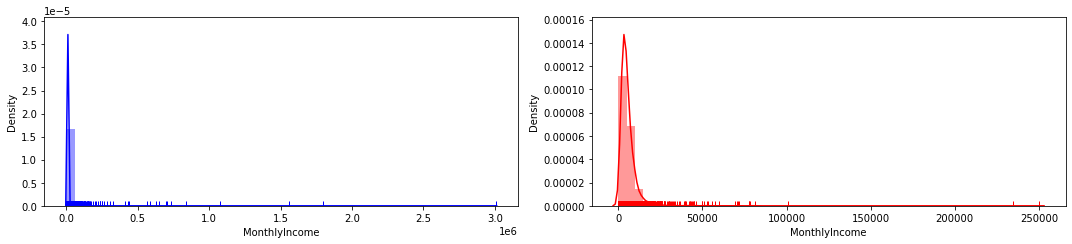

In [58]:
plt.rcParams["figure.figsize"] = [15.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1, 2)
sns.distplot(train_data.loc[(train_data['SeriousDlqin2yrs']==0),'MonthlyIncome'], ax=ax[0],color='b',rug=True)
sns.distplot(train_data.loc[(train_data['SeriousDlqin2yrs']==1),'MonthlyIncome'], ax=ax[1],color='r',rug=True)
plt.show()

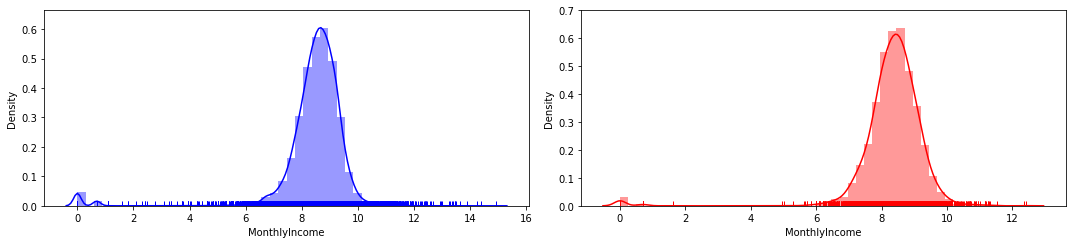

In [59]:
plt.rcParams["figure.figsize"] = [15.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1, 2)
sns.distplot(np.log(train_data.loc[(train_data['SeriousDlqin2yrs']==0),'MonthlyIncome']+1), ax=ax[0],color='b',rug=True)
sns.distplot(np.log(train_data.loc[(train_data['SeriousDlqin2yrs']==1),'MonthlyIncome']+1), ax=ax[1],color='r',rug=True)
plt.show()

In [60]:
transformed_data['MonthlyIncome_lg'] = np.log(transformed_data['MonthlyIncome']+1)
test_data['MonthlyIncome_lg'] = np.log(test_data['MonthlyIncome']+1)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


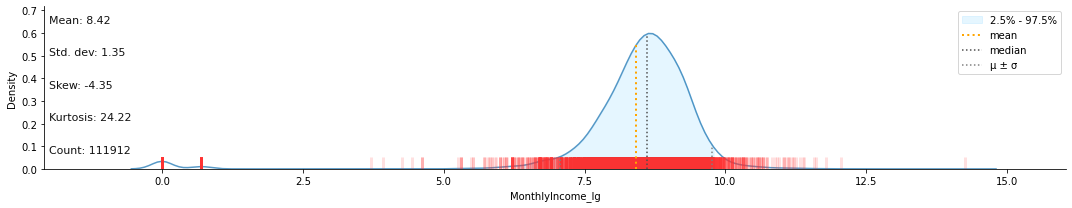

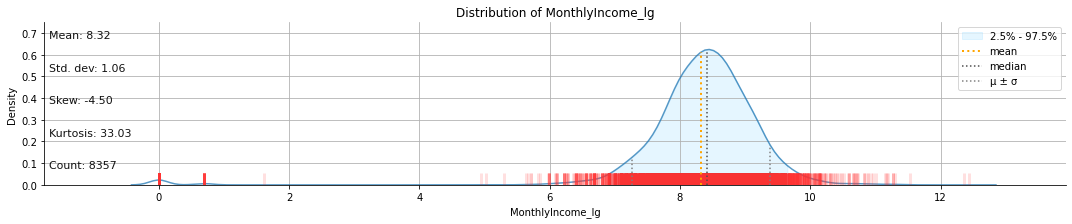

In [61]:
klib.dist_plot(transformed_data.loc[transformed_data['SeriousDlqin2yrs']==0,'MonthlyIncome_lg'])
klib.dist_plot(transformed_data.loc[transformed_data['SeriousDlqin2yrs']==1,'MonthlyIncome_lg'])
plt.grid()
plt.title("Distribution of MonthlyIncome_lg");

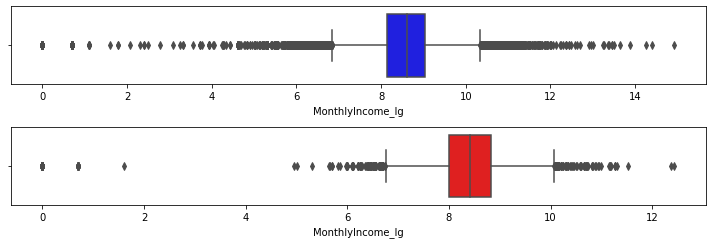

In [62]:
plt.rcParams["figure.figsize"] = [10.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(2, 1)
sns.boxplot(transformed_data.loc[transformed_data['SeriousDlqin2yrs']==0,'MonthlyIncome_lg'], ax=ax[0],color='b')
sns.boxplot(transformed_data.loc[transformed_data['SeriousDlqin2yrs']==1,'MonthlyIncome_lg'], ax=ax[1],color='r')
plt.show()

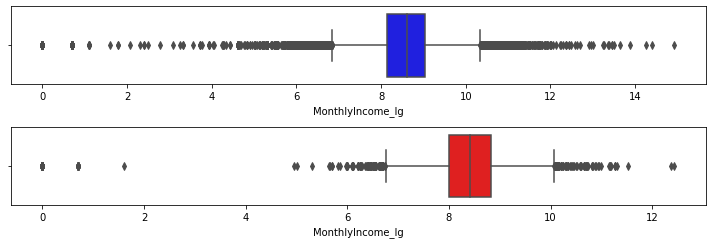

In [63]:
plt.rcParams["figure.figsize"] = [10.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(2, 1)
sns.boxplot(transformed_data.loc[transformed_data['SeriousDlqin2yrs']==0,'MonthlyIncome_lg'], ax=ax[0],color='b')
sns.boxplot(transformed_data.loc[transformed_data['SeriousDlqin2yrs']==1,'MonthlyIncome_lg'], ax=ax[1],color='r')
plt.show()

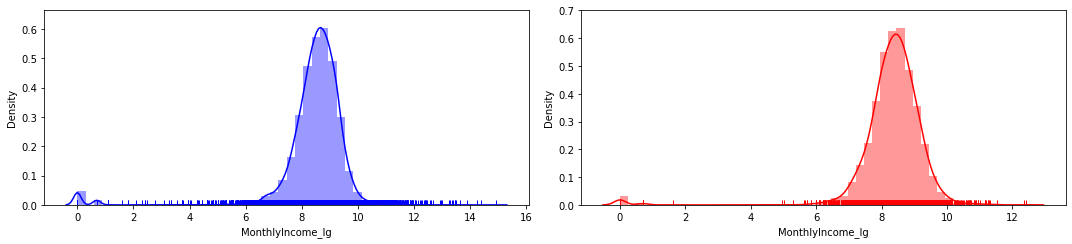

In [64]:
plt.rcParams["figure.figsize"] = [15.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1, 2)
sns.distplot(transformed_data.loc[(transformed_data['SeriousDlqin2yrs']==0),'MonthlyIncome_lg'], ax=ax[0],color='b',rug=True)
sns.distplot(transformed_data.loc[(transformed_data['SeriousDlqin2yrs']==1),'MonthlyIncome_lg'], ax=ax[1],color='r',rug=True)
plt.show()

In [65]:
train_data.loc[train_data.age==0,:]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_cat
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0,NaN


In [66]:
transformed_data.loc[transformed_data.age==0,:]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Weighted_Delay_sum,age_cat,MonthlyIncome_lg
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0,0.2,NaN,8.699681


In [67]:
test_data.loc[test_data.age==0,:]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Weighted_Delay_sum,age_cat,MonthlyIncome_lg


In [68]:
train_data.drop(train_data[train_data.age==0].index,axis=0,inplace=True)
transformed_data.drop(transformed_data[transformed_data.age==0].index,axis=0,inplace=True)

0    139973
1     10026
Name: SeriousDlqin2yrs, dtype: int64


<AxesSubplot:xlabel='age_cat', ylabel='MonthlyIncome'>

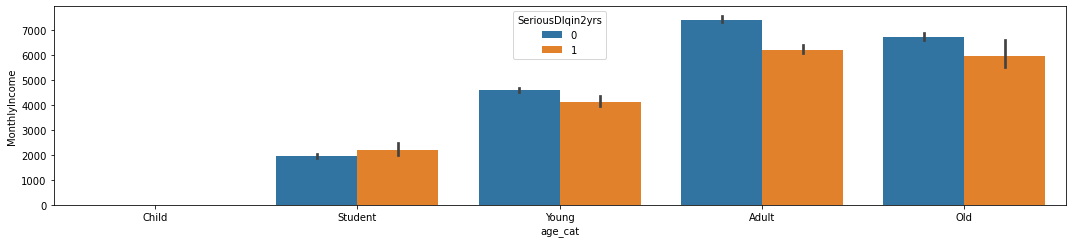

In [69]:
print(train_data.loc[:,'SeriousDlqin2yrs'].value_counts())
sns.barplot(x='age_cat',y='MonthlyIncome',data=train_data,hue='SeriousDlqin2yrs')

In [70]:
train_data.loc[train_data.MonthlyIncome<=1]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_cat
14,0,0.019653,76,0,477.0,0.0,6,0,1,0,0.0,Old
44,0,0.368896,68,0,1687.5,1.0,31,0,1,0,0.0,Old
50,0,0.818848,73,0,3095.0,0.0,9,0,1,1,0.0,Old
73,0,0.059662,31,0,3162.0,0.0,11,0,2,0,1.0,Young
90,0,0.039398,51,0,15466.0,0.0,7,0,0,0,0.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
149562,0,0.230835,72,0,430.0,0.0,7,0,0,0,0.0,Old
149646,0,0.080078,69,0,1248.0,0.0,8,0,1,0,1.0,Old
149673,0,0.132324,82,0,4123.0,0.0,14,0,2,0,0.0,Old
149882,0,0.062408,77,0,714.5,1.0,3,0,0,0,0.0,Old


In [71]:
train_data.loc[(train_data.MonthlyIncome<=1)&(train_data.age_cat=='Student')&(train_data.DebtRatio>1)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_cat
298,0,0.085144,25,0,1005.0,0.0,5,0,0,0,0.0,Student
6244,0,1.000000,24,0,141.0,0.0,1,0,0,0,0.0,Student
8184,0,1.000000,22,0,965.0,0.0,1,0,0,0,0.0,Student
9193,0,0.099792,23,0,9.0,0.0,1,0,0,0,0.0,Student
9239,0,0.197144,21,0,8.0,0.0,2,0,0,0,0.0,Student
...,...,...,...,...,...,...,...,...,...,...,...,...
140783,0,0.150513,25,0,45.0,1.0,6,0,0,0,0.0,Student
143004,0,0.583008,23,0,8.0,0.0,1,0,0,0,0.0,Student
147838,0,0.657227,23,0,19.0,0.0,2,0,0,0,0.0,Student
148758,0,0.079895,23,0,2.0,0.0,1,0,0,0,0.0,Student


0    2156
1      83
Name: SeriousDlqin2yrs, dtype: int64


<AxesSubplot:xlabel='age_cat', ylabel='MonthlyIncome'>

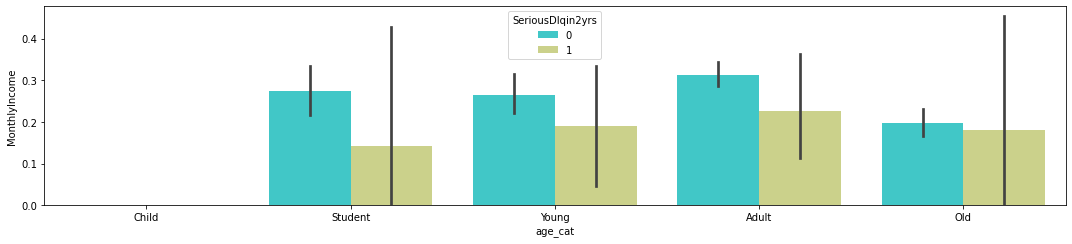

In [72]:
print(train_data.loc[train_data.MonthlyIncome<=1,'SeriousDlqin2yrs'].value_counts())
sns.barplot(x='age_cat',y='MonthlyIncome',data=train_data[train_data.MonthlyIncome<=1],hue='SeriousDlqin2yrs',palette='rainbow')

<AxesSubplot:xlabel='age_cat', ylabel='MonthlyIncome'>

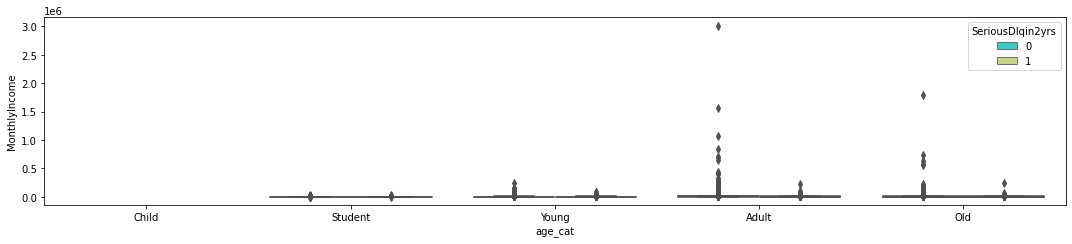

In [73]:
sns.boxplot(x='age_cat',y='MonthlyIncome',data=train_data[train_data.MonthlyIncome>1],hue='SeriousDlqin2yrs',palette='rainbow')

<AxesSubplot:xlabel='age_cat', ylabel='MonthlyIncome'>

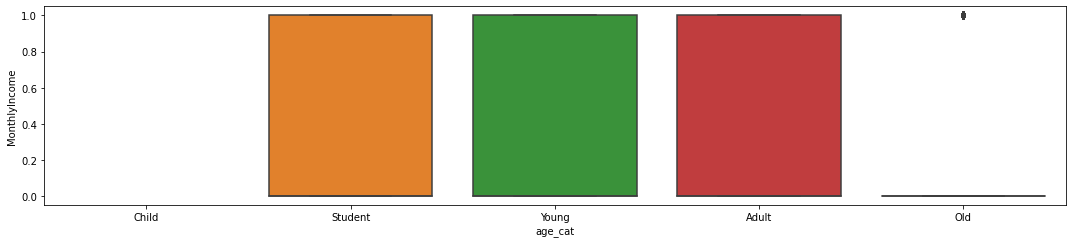

In [74]:
sns.boxplot(x='age_cat',y='MonthlyIncome',data=train_data[train_data.MonthlyIncome<=1])

> - `MonthlyIncome` is also the parameter highly skewed and contains outliers.
> - There are values with `MonthlyIncome` 0 to 10, for which we dosen't have the interpretation.
> - For this values the `DebtRatio` is more as it is ration of debt to income.
> - `DebtRatio` is dependant on `MonthlyIncome` so `MonthlyIncome` needs to be cleaned. It is also contains null values.
> - Outliers in `MonthlyIncome` can be handle by using `log transform`.

In [75]:
child = 0 #transformed_data.loc[transformed_data.age_cat=='Child','MonthlyIncome_lg'].median()

In [76]:
student = transformed_data.loc[transformed_data.age_cat=='Student','MonthlyIncome_lg'].median()

In [77]:
young = transformed_data.loc[transformed_data.age_cat=='Young','MonthlyIncome_lg'].median()

In [78]:
adult = transformed_data.loc[transformed_data.age_cat=='Adult','MonthlyIncome_lg'].median()

In [79]:
old = transformed_data.loc[transformed_data.age_cat=='Old','MonthlyIncome_lg'].median()

In [80]:
transformed_data.loc[(transformed_data.age_cat=='Child')&(transformed_data.MonthlyIncome_lg.isna()),'MonthlyIncome_lg'] = 0

In [81]:
transformed_data.loc[(transformed_data.age_cat=='Student')&(transformed_data.MonthlyIncome_lg.isna()),'MonthlyIncome_lg'] = student

In [82]:
transformed_data.loc[(transformed_data.age_cat=='Young')&(transformed_data.MonthlyIncome_lg.isna()),'MonthlyIncome_lg'] = young

In [83]:
transformed_data.loc[(transformed_data.age_cat=='Adult')&(transformed_data.MonthlyIncome_lg.isna()),'MonthlyIncome_lg'] = adult

In [84]:
transformed_data.loc[(transformed_data.age_cat=='Old')&(transformed_data.MonthlyIncome_lg.isna()),'MonthlyIncome_lg'] = old

In [85]:
child = 0 #test_data.loc[test_data.age_cat=='Child','MonthlyIncome_lg'].median()
student = test_data.loc[test_data.age_cat=='Student','MonthlyIncome_lg'].median()
young = test_data.loc[test_data.age_cat=='Young','MonthlyIncome_lg'].median()
adult = test_data.loc[test_data.age_cat=='Adult','MonthlyIncome_lg'].median()
old = test_data.loc[test_data.age_cat=='Old','MonthlyIncome_lg'].median()

test_data.loc[(test_data.age_cat=='Child')&(test_data.MonthlyIncome_lg.isna()),'MonthlyIncome_lg'] = 0
test_data.loc[(test_data.age_cat=='Student')&(test_data.MonthlyIncome_lg.isna()),'MonthlyIncome_lg'] = student
test_data.loc[(test_data.age_cat=='Young')&(test_data.MonthlyIncome_lg.isna()),'MonthlyIncome_lg'] = young
test_data.loc[(test_data.age_cat=='Adult')&(test_data.MonthlyIncome_lg.isna()),'MonthlyIncome_lg'] = adult
test_data.loc[(test_data.age_cat=='Old')&(test_data.MonthlyIncome_lg.isna()),'MonthlyIncome_lg'] = old

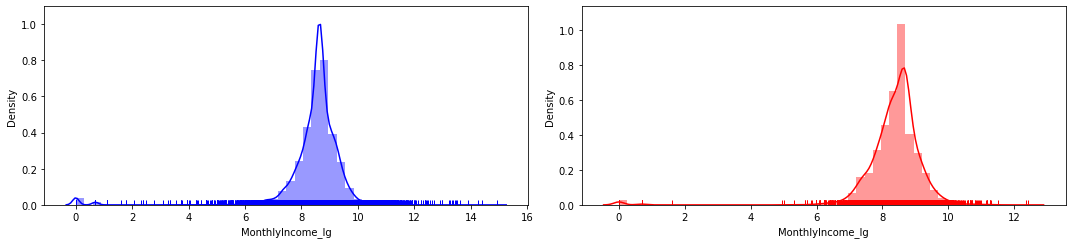

In [86]:
plt.rcParams["figure.figsize"] = [15.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1, 2)
sns.distplot(transformed_data.loc[(transformed_data['SeriousDlqin2yrs']==0),'MonthlyIncome_lg'], ax=ax[0],color='b',rug=True)
sns.distplot(transformed_data.loc[(transformed_data['SeriousDlqin2yrs']==1),'MonthlyIncome_lg'], ax=ax[1],color='r',rug=True)
plt.show()

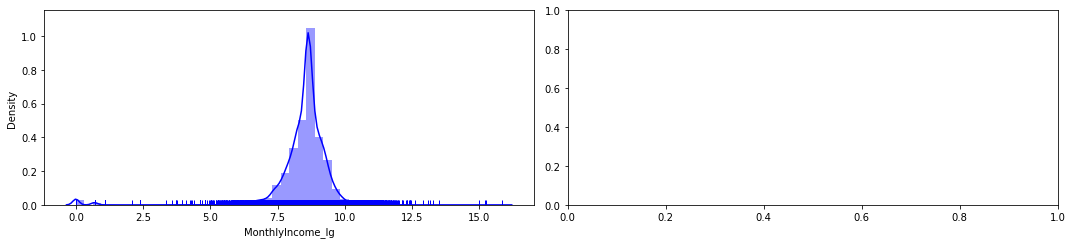

In [87]:
plt.rcParams["figure.figsize"] = [15.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1, 2)
sns.distplot(test_data.loc[:,'MonthlyIncome_lg'], ax=ax[0],color='b',rug=True)
plt.show()

In [88]:
transformed_data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
Weighted_Delay_sum                          0
age_cat                                     0
MonthlyIncome_lg                            0
dtype: int64

In [89]:
test_data.isna().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
Weighted_Delay_sum                           0
age_cat                                      0
MonthlyIncome_lg                             0
dtype: int64

In [90]:
#transformed_data.dropna(subset='age_cat',inplace=True)

# Analyzing DebtRatio

In [91]:
res = mark_outliers_zscore(train_data.DebtRatio)

Number of outliers :  659


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='DebtRatio', ylabel='Density'>

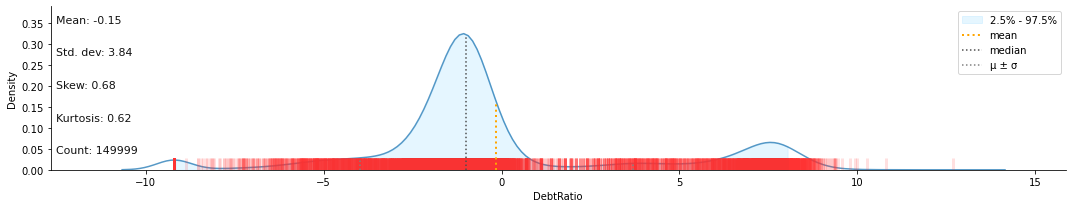

In [92]:
klib.dist_plot(np.log(train_data.DebtRatio+0.0001))

In [93]:
transformed_data[(transformed_data.index.isin(res))]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Weighted_Delay_sum,age_cat,MonthlyIncome_lg
90,0,0.039398,51,0,15466.0,0.0,7,0,0,0,0.0,0.0,Adult,0.000000
351,0,0.000000,58,0,8380.0,NaN,20,0,5,0,0.0,0.0,Adult,8.699681
508,0,1.000000,73,0,8500.0,0.0,2,0,0,0,0.0,0.0,Old,0.000000
535,0,0.749512,62,0,7963.0,NaN,7,0,2,0,3.0,0.0,Old,8.561019
844,0,0.734375,45,0,11311.0,0.0,6,0,2,1,0.0,0.3,Adult,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148793,1,1.000000,45,0,6514.0,NaN,7,0,3,0,0.0,0.0,Adult,8.699681
148872,0,0.897461,47,2,20351.0,NaN,9,0,5,0,2.0,0.4,Adult,8.699681
149354,0,0.207642,64,0,7335.0,NaN,18,0,2,0,0.0,0.0,Old,8.561019
149533,0,0.329834,62,0,6578.0,NaN,16,0,3,0,0.0,0.0,Old,8.561019


In [94]:
train_data[(train_data.index.isin(res))]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_cat
90,0,0.039398,51,0,15466.0,0.0,7,0,0,0,0.0,Adult
351,0,0.000000,58,0,8380.0,NaN,20,0,5,0,0.0,Adult
508,0,1.000000,73,0,8500.0,0.0,2,0,0,0,0.0,Old
535,0,0.749512,62,0,7963.0,NaN,7,0,2,0,3.0,Old
844,0,0.734375,45,0,11311.0,0.0,6,0,2,1,0.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
148793,1,1.000000,45,0,6514.0,NaN,7,0,3,0,0.0,Adult
148872,0,0.897461,47,2,20351.0,NaN,9,0,5,0,2.0,Adult
149354,0,0.207642,64,0,7335.0,NaN,18,0,2,0,0.0,Old
149533,0,0.329834,62,0,6578.0,NaN,16,0,3,0,0.0,Old


> - Out of 659 outliers 616 records are having `MonthlyIncome` as Null.
> - For these records Dividing DebtRatio by `MonthlyIncome` might adjust the outliers

In [95]:
transformed_data['DebtRatio_transformed'] = transformed_data['DebtRatio']
test_data['DebtRatio_transformed'] = test_data['DebtRatio']

In [96]:
transformed_data.loc[(transformed_data.index.isin(res)),'DebtRatio_transformed']

90        15466.0
351        8380.0
508        8500.0
535        7963.0
844       11311.0
           ...   
148793     6514.0
148872    20351.0
149354     7335.0
149533     6578.0
149848    15968.0
Name: DebtRatio_transformed, Length: 659, dtype: float32

In [97]:
def debt(df):
    a = df.loc[(df.index.isin(res)),'DebtRatio_transformed']
    b = np.exp(df.loc[(df.index.isin(res)),'MonthlyIncome_lg'])-1
    
    for i,j in zip(df.loc[df.index.isin(res),'DebtRatio_transformed'].index,df.loc[df.index.isin(res),'DebtRatio_transformed'].values):
        if b[i]>1:
            df.loc[i,'DebtRatio_transformed'] = j/b[i]
    return df

In [98]:
debt(test_data)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Weighted_Delay_sum,age_cat,MonthlyIncome_lg,DebtRatio_transformed
0,NaN,0.885742,43,0,0.177513,5700.0,4,0,0,0,0.0,0.0,Adult,8.648396,0.177513
1,NaN,0.463379,57,0,0.527237,9141.0,15,0,4,0,2.0,0.0,Adult,9.120634,0.527237
2,NaN,0.043274,59,0,0.687648,5083.0,12,0,1,0,2.0,0.0,Adult,8.533854,0.687648
3,NaN,0.280273,38,1,0.925961,3200.0,7,0,2,0,0.0,0.2,Adult,8.071218,0.925961
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0,0.0,Young,8.259975,0.019917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101498,NaN,0.282715,24,0,0.068522,1400.0,5,0,0,0,0.0,0.0,Student,7.244942,0.068522
101499,NaN,0.922363,36,3,0.934217,7615.0,8,0,2,0,4.0,0.6,Adult,8.938006,0.934217
101500,NaN,0.081604,70,0,836.000000,NaN,3,0,0,0,NaN,0.0,Old,8.576593,836.000000
101501,NaN,0.335449,56,0,3568.000000,NaN,8,0,2,1,3.0,0.3,Adult,8.699681,3568.000000


In [99]:
transformed_data.loc[(transformed_data.index.isin(res)),'DebtRatio_transformed']

90        15466.0
351        8380.0
508        8500.0
535        7963.0
844       11311.0
           ...   
148793     6514.0
148872    20351.0
149354     7335.0
149533     6578.0
149848    15968.0
Name: DebtRatio_transformed, Length: 659, dtype: float32

In [100]:
res = mark_outliers_zscore(transformed_data['DebtRatio_transformed'])

Number of outliers :  659


In [101]:
res = mark_outliers_zscore(test_data['DebtRatio_transformed'])

Number of outliers :  872


### skewness
·> skewness is between `-0.5 and 0.5`, the data are fairly `symmetrical`

·> skewness is between `-1 and — 0.5` or between `0.5 and 1`, the data are `moderately skewed`

·> skewness is less than `-1 or greater than 1`, the data are `highly skewed` 

### Kurtosis - determine the volume of the outlier
·> `Kurtosis > 3` --> `leptokurtic` --> `distribution is tall and thin`

·> `Kurtosis < 3` --> `platykurtic` --> `moderately spread out`

·> `Kurtosis = 3`--> `mesokurtic`(looks more close to a normal distribution) ==> between `leptokurtic` and `platykurtic`

In [102]:
train_data.NumberOfDependents.value_counts()

0.0     86902
1.0     26316
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

In [103]:
transformed_data['NumberOfDependentsTR'] = transformed_data['NumberOfDependents']
test_data['NumberOfDependentsTR'] = test_data['NumberOfDependents']
transformed_data.loc[transformed_data.NumberOfDependentsTR>=7,'NumberOfDependentsTR'] = 7
test_data.loc[test_data.NumberOfDependentsTR>=7,'NumberOfDependentsTR'] = 7

In [104]:
transformed_data.NumberOfDependentsTR.value_counts()

0.0    86902
1.0    26316
2.0    19521
3.0     9483
4.0     2862
5.0      746
6.0      158
7.0       87
Name: NumberOfDependentsTR, dtype: int64

In [105]:
train_data.NumberRealEstateLoansOrLines.value_counts()

0     56188
1     52338
2     31521
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
15        7
14        7
17        4
16        4
25        3
18        2
23        2
19        2
20        2
26        1
54        1
21        1
29        1
32        1
Name: NumberRealEstateLoansOrLines, dtype: int64

In [106]:
transformed_data['NumberRealEstateLoansOrLinesTR'] = transformed_data['NumberRealEstateLoansOrLines']
test_data['NumberRealEstateLoansOrLinesTR'] = test_data['NumberRealEstateLoansOrLines']

transformed_data.loc[transformed_data.NumberRealEstateLoansOrLinesTR>=11,'NumberRealEstateLoansOrLinesTR'] = 11
test_data.loc[test_data.NumberRealEstateLoansOrLinesTR>=11,'NumberRealEstateLoansOrLinesTR'] = 11

In [107]:
train_data.NumberOfOpenCreditLinesAndLoans.value_counts()

6     13613
7     13245
5     12931
8     12562
4     11609
9     11355
10     9624
3      9058
11     8321
12     7005
2      6666
13     5667
14     4546
1      4438
15     3645
16     3000
17     2370
0      1888
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
38       13
40       10
39        9
42        8
45        8
43        8
37        7
48        6
49        4
54        4
41        4
52        3
46        3
57        2
51        2
56        2
47        2
50        2
44        2
58        1
53        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

In [108]:
transformed_data['NumberOfOpenCreditLinesAndLoansTR'] = transformed_data['NumberOfOpenCreditLinesAndLoans']
test_data['NumberOfOpenCreditLinesAndLoansTR'] = test_data['NumberOfOpenCreditLinesAndLoans']

transformed_data.loc[transformed_data.NumberOfOpenCreditLinesAndLoansTR>=25,'NumberOfOpenCreditLinesAndLoansTR'] = 25
test_data.loc[test_data.NumberOfOpenCreditLinesAndLoansTR>=25,'NumberOfOpenCreditLinesAndLoansTR'] = 25

In [109]:
transformed_data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
Weighted_Delay_sum                          0
age_cat                                     0
MonthlyIncome_lg                            0
DebtRatio_transformed                       0
NumberOfDependentsTR                     3924
NumberRealEstateLoansOrLinesTR              0
NumberOfOpenCreditLinesAndLoansTR           0
dtype: int64

In [110]:
transformed_data.loc[transformed_data.NumberOfDependents.isna(),'NumberOfDependents'] = 0
test_data.loc[test_data.NumberOfDependents.isna(),'NumberOfDependents'] = 0

transformed_data.loc[transformed_data.NumberOfDependentsTR.isna(),'NumberOfDependentsTR'] = 0
test_data.loc[test_data.NumberOfDependentsTR.isna(),'NumberOfDependentsTR'] = 0

# Modelling

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix,log_loss

In [112]:
def data_build(df):
    X = df.drop('SeriousDlqin2yrs',axis=1)
    y = df.SeriousDlqin2yrs
    sc = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)    

    return X, y, X_train, y_train, X_test, y_test

In [113]:
def modelling(model, X_train, y_train, X_test, y_test,env = True):
    if env:
        print('I am here')
        model_ = model.fit(X_train, y_train)
        predictions = model_.predict(X_test)
        

        print("="*100)
        print('log loss, ', log_loss(y_test,predictions))
        print('Accuracy Score, ', accuracy_score(y_test,predictions))
        print('Recall Score, ', recall_score(y_test,predictions))
        print('Precision Score, ', precision_score(y_test,predictions))
        print("="*100)
        print('Confusion Matrix, \n', confusion_matrix(y_test,predictions))
    else:
        print('I am here_1')
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        model_ = model.fit(X_train, y_train)
        predictions = model.predict_proba(X_test)
    return predictions

In [114]:
age_map = {'Child':0,'Student':1, 'Young':2, 'Adult':3, 'Old':4}
transformed_data.age_cat = transformed_data.age_cat.map(age_map)

In [115]:
test_data.age_cat = test_data.age_cat.map(age_map)

In [116]:
transformed_data['MonthlyIncome_nolg_'] = np.exp(transformed_data['MonthlyIncome_lg'])-1
test_data['MonthlyIncome_nolg_'] = np.exp(test_data['MonthlyIncome_lg'])-1

In [212]:
# transformed_feature = ['SeriousDlqin2yrs',
#                        'RevolvingUtilizationOfUnsecuredLines',
#                        'Weighted_Delay_sum', 
#                        'age',
#                        'MonthlyIncome_nolg_', 
#                        'DebtRatio', 
#                        'NumberOfDependentsTR',
#                        'NumberRealEstateLoansOrLinesTR', 
#                        'NumberOfOpenCreditLinesAndLoansTR']

transformed_feature = ['SeriousDlqin2yrs',
                        'RevolvingUtilizationOfUnsecuredLines',
                           'Weighted_Delay_sum', 
                           'age_cat',
                           'MonthlyIncome_nolg_', 
                           'DebtRatio', 
                           'NumberOfDependentsTR',
                           'NumberRealEstateLoansOrLinesTR', 
                           'NumberOfOpenCreditLinesAndLoansTR']

In [213]:
transformed_data[transformed_feature]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,Weighted_Delay_sum,age_cat,MonthlyIncome_nolg_,DebtRatio,NumberOfDependentsTR,NumberRealEstateLoansOrLinesTR,NumberOfOpenCreditLinesAndLoansTR
0,1,0.766113,0.4,3,9120.000977,0.802982,2.0,6,13
1,0,0.957031,0.0,3,2600.000000,0.121876,1.0,0,4
2,0,0.658203,0.7,3,3042.000732,0.085113,0.0,0,2
3,0,0.233765,0.0,2,3300.001221,0.036050,0.0,0,5
4,0,0.907227,0.2,3,63588.003906,0.024926,0.0,1,7
...,...,...,...,...,...,...,...,...,...
149995,0,0.040680,0.0,4,2100.000488,0.225131,0.0,1,4
149996,0,0.299805,0.0,3,5584.001953,0.716562,2.0,1,4
149997,0,0.246094,0.0,3,5999.999023,3870.000000,0.0,1,18
149998,0,0.000000,0.0,2,5715.999512,0.000000,0.0,0,4


In [214]:
transformed_data_bkp = transformed_data.copy()
test_data_bkp = test_data.copy()

In [215]:
df = transformed_data[transformed_feature]

In [216]:
X, y, X_train, y_train, X_test, y_test = data_build(df)

In [130]:
pred = modelling(RandomForestClassifier(random_state=0),X_train, y_train, X_test, y_test)

I am here
log loss,  2.2365868756852447
Accuracy Score,  0.9352444444444444
Recall Score,  0.19792364367046217
Precision Score,  0.5324324324324324
Confusion Matrix, 
 [[41495   519]
 [ 2395   591]]


In [151]:
df_test = test_data[transformed_feature]
df_test.drop('SeriousDlqin2yrs',axis=1)

,RevolvingUtilizationOfUnsecuredLines,Weighted_Delay_sum,age_cat,MonthlyIncome_nolg_,DebtRatio,NumberOfDependentsTR,NumberRealEstateLoansOrLinesTR,NumberOfOpenCreditLinesAndLoansTR
0,0.885742,0.0,3,5699.998047,0.177513,0.0,0,4
1,0.463379,0.0,3,9140.997070,0.527237,2.0,4,15
2,0.043274,0.0,3,5083.000000,0.687648,2.0,1,12
3,0.280273,0.2,3,3199.999756,0.925961,0.0,2,7
4,1.000000,0.0,2,3864.999023,0.019917,1.0,0,4
...,...,...,...,...,...,...,...,...
101498,0.282715,0.0,1,1400.000244,0.068522,0.0,0,5
101499,0.922363,0.6,3,7614.998535,0.934217,4.0,2,8
101500,0.081604,0.0,4,5304.999512,836.000000,0.0,0,3
101501,0.335449,0.3,3,5999.999023,3568.000000,3.0,2,8


In [132]:
Xtest = df_test.drop('SeriousDlqin2yrs',axis=1)

In [133]:
pred = modelling(RandomForestClassifier(random_state=0),X, y, Xtest, None, False)

I am here_1


In [134]:
Xtest['Probability'] = pred[:,1]
Xtest['Id'] = range(1,101504)

In [ ]:
Xtest[['Id','Probability']].to_csv('DataSet/submission_14.csv',index=False)